/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


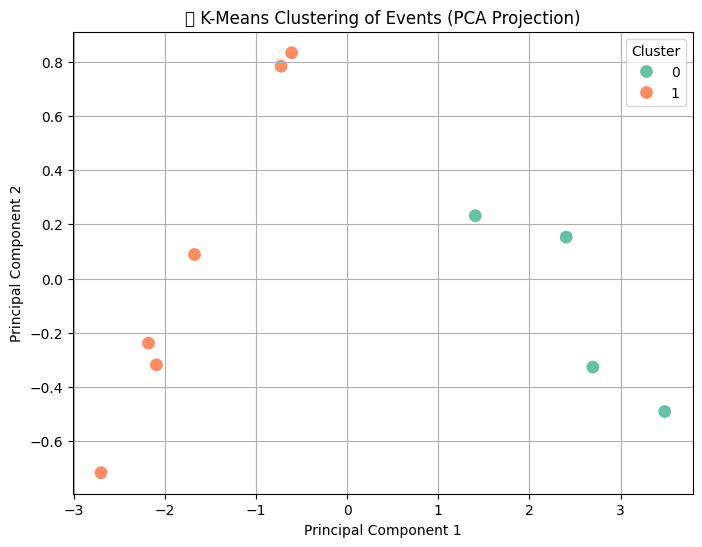

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://860453a3df06b88abe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
# Step 1: Install dependencies
!pip install gradio scikit-learn pandas matplotlib seaborn -q

# Step 2: Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import numpy as np

# Step 3: Sample synthetic dataset
data = {
    "attendees": [150, 500, 60, 700, 80, 400, 120, 30, 50, 600],
    "budget": [1000, 7000, 800, 10000, 600, 5000, 1500, 300, 400, 8000],
    "engagement_score": [65, 90, 45, 95, 30, 80, 60, 20, 35, 85],
    "social_reach": [2000, 10000, 1500, 12000, 900, 8000, 2500, 400, 700, 11000],
    "satisfaction_rating": [3.5, 4.8, 2.5, 4.9, 2.2, 4.3, 3.9, 1.5, 2.0, 4.7]
}
df = pd.DataFrame(data)

# Step 4: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 5: KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Step 6: Determine which cluster is "Success"
success_cluster = df.groupby("cluster")["engagement_score"].mean().idxmax()

# Step 7: Visualize using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
plt.title('📊 K-Means Clustering of Events (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 8: Gradio Prediction function
def predict_event_success(attendees, budget, engagement_score, social_reach, satisfaction_rating):
    input_data = np.array([[attendees, budget, engagement_score, social_reach, satisfaction_rating]])
    input_scaled = scaler.transform(input_data)
    cluster = kmeans.predict(input_scaled)[0]
    return "🎉 Success" if cluster == success_cluster else "❌ Not Successful"

# Step 9: Gradio UI
interface = gr.Interface(
    fn=predict_event_success,
    inputs=[
        gr.Number(label="Number of Attendees"),
        gr.Number(label="Event Budget (USD)"),
        gr.Slider(0, 100, step=1, label="Engagement Score"),
        gr.Number(label="Social Media Reach"),
        gr.Slider(1.0, 5.0, step=0.1, label="Satisfaction Rating")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="📊 Event Success Predictor (K-Means Clustering)",
    description="Predict whether an event was successful based on attendees, budget, engagement, and more. Below is the cluster visualization."
)

interface.launch()
